In [1]:
import pandas as pd
import re
import numpy as np

In [4]:
df = pd.read_csv("../data/processed/clean_data.csv")

In [5]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,unigram_ques1,unigram_ques2,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_share,common_word_ratio,words
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,"['market', 'share', 'invest', 'india', 'guide'...","['market', 'share', 'invest', 'guide', 'step']",1,1,66,57,15,13,5,0.833333,"['share', 'market', 'invest', 'india', 'guide'..."
1,1,3,4,what is the story of kohinoor koh i noor diamond,what would happen if the indian government sto...,0,"['diamond', 'koh', 'kohinoor', 'story', 'noor']","['diamond', 'would', 'koh', 'indian', 'stole',...",4,1,49,86,11,16,4,0.363636,"['diamond', 'would', 'koh', 'kohinoor', 'india..."
2,2,5,6,how can i increase the speed of my internet nn...,how can internet speed be increased by hacking...,0,"['using', 'vpn', 'increase', 'speed', 'nnectio...","['speed', 'increased', 'dns', 'internet', 'hac...",1,1,71,59,15,11,2,0.222222,"['using', 'increase', 'nnection', 'speed', 'in..."
3,3,7,8,why am i mentally very lonely how can i solve it,find the remainder when math math is divided by,0,"['lonely', 'mentally', 'solve']","['remainder', 'divided', 'math', 'find']",1,1,49,48,12,10,0,0.000000,"['math', 'solve', 'find', 'remainder', 'mental..."
4,4,9,10,which one dissolve in water quickly sugar salt...,which fish would survive in salt water,0,"['oxide', 'methane', 'di', 'water', 'quickly',...","['survive', 'would', 'water', 'fish', 'salt']",3,1,75,39,14,8,2,0.153846,"['oxide', 'methane', 'survive', 'di', 'would',..."


In [7]:
from fuzzywuzzy import fuzz
Str1 = "Apple Inc."
Str2 = "apple Inc"
Ratio = fuzz.ratio(Str1.lower(),Str2.lower())
print(Ratio)

95


In [9]:
def get_fuzz_ratio(row):
    return fuzz.ratio(row['question1'],row['question2'])

In [11]:
df['fuzz_ratio'] = df.apply(lambda x : get_fuzz_ratio(x), axis=1)

In [13]:
df.tail()

,id,qid1,qid2,question1,question2,is_duplicate,unigram_ques1,unigram_ques2,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_share,common_word_ratio,words,fuzz_ratio
403951,404284,537926,537927,what does jainism say about homosexuality,what does jainism say about gays and homosexua...,1,"['jainism', 'say', 'homosexuality']","['jainism', 'say', 'homosexuality', 'gays']",1,1,42,51,7,9,3,0.75,"['jainism', 'say', 'homosexuality', 'gays']",90
403952,404285,433578,379845,how many keywords are there in the racket prog...,how many keywords are there in perl programmin...,0,"['racket', 'programming', 'latest', 'many', 'v...","['perl', 'programming', 'latest', 'many', 'ver...",2,2,85,79,15,14,6,0.75,"['racket', 'perl', 'programming', 'latest', 'm...",91
403953,404286,18840,155606,do you believe there is life after death,is it true that there is life after death,1,"['death', 'life', 'believe']","['true', 'death', 'life']",12,1,41,42,9,10,2,0.50,"['life', 'true', 'death', 'believe']",72
403954,404288,537930,537931,what is the approx annual st of living while s...,i am having little hairfall problem but i want...,0,"['student', 'st', 'indian', 'uic', 'chicago', ...","['clay', 'problem', 'wax', 'use', 'hair', 'gel...",1,1,91,125,18,26,0,0.00,"['little', 'chicago', 'annual', 'student', 'st...",30
403955,404289,537932,537933,what is like to have sex with usin,what is it like to have sex with your usin,0,"['usin', 'like', 'sex']","['usin', 'like', 'sex']",1,1,35,43,9,11,3,1.00,"['usin', 'like', 'sex']",90


In [14]:
features = ['freq_qid1', 'freq_qid1', 'common_word_ratio', 'fuzz_ratio']

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Distribution of Fuzz Ratio')

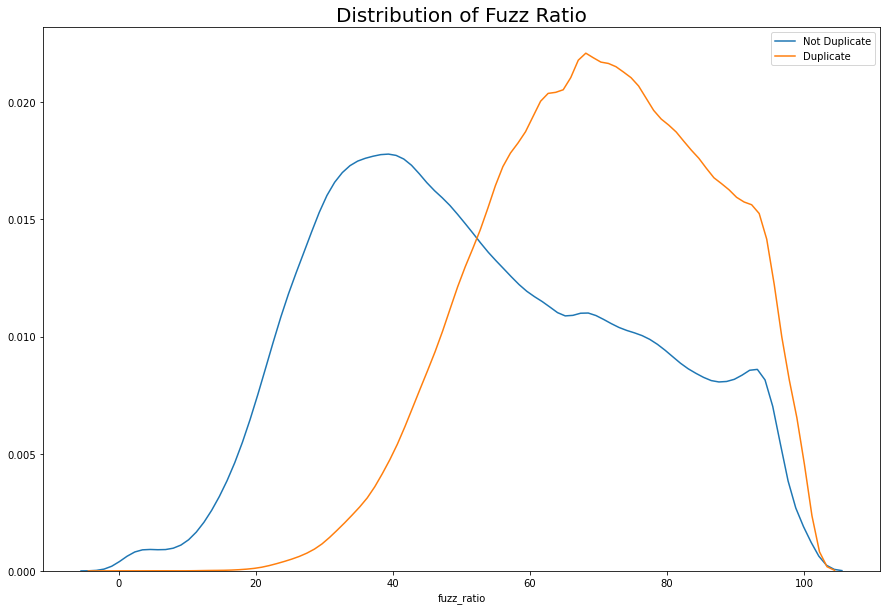

In [27]:
plt.subplots(figsize = (15,10))
sns.distplot(df[df.is_duplicate == 0].fuzz_ratio, kde=True, hist=False, label = 'Not Duplicate')
sns.distplot(df[df.is_duplicate ==1].fuzz_ratio, kde = True, hist=False, label = 'Duplicate')
plt.title('Distribution of Fuzz Ratio', size = 20)

Text(0.5, 1.0, 'Distribution of Word Share')

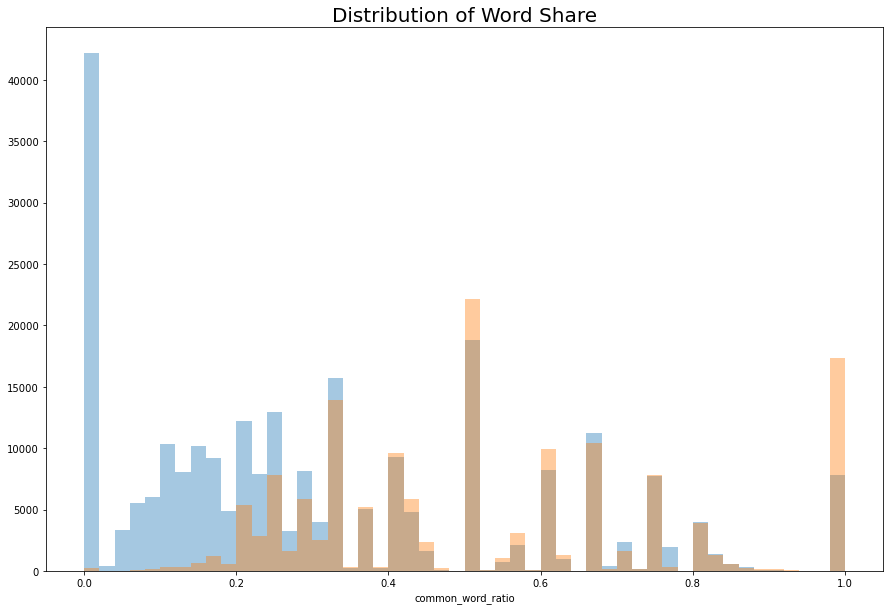

In [32]:
plt.subplots(figsize = (15,10))
sns.distplot(df[df.is_duplicate == 0].common_word_ratio, kde=False, hist=True, label = 'Not Duplicate')
sns.distplot(df[df.is_duplicate ==1].common_word_ratio, kde = False, hist=True, label = 'Duplicate')
plt.title('Distribution of Word Share', size = 20)